# ***1. Linear Regression Model***

In [18]:
import numpy as np
import matplotlib.pyplot as plt

class LinearRegression:
    def __init__(self, batch_size=32, regularization=0, max_epochs=100, patience=3):
        """Linear Regression using Gradient Descent.

        Parameters:
        -----------
        batch_size: int
            The number of samples per batch.
        regularization: float
            The regularization parameter.
        max_epochs: int
            The maximum number of epochs.
        patience: int
            The number of epochs to wait before stopping if the validation loss
            does not improve.
        """
        self.batch_size = batch_size
        self.regularization = regularization
        self.max_epochs = max_epochs
        self.patience = patience
        self.weights = None
        self.bias = None
        self.Loss_History = []

    def fit(self, X, y, batch_size=32, regularization=0, max_epochs=100, patience=3):
        """Fit a linear model using gradient descent with early stopping.

        Parameters:
        -----------
        X: np.ndarray
            Input data (features).
        y: np.ndarray
            Target values.
        batch_size: int
            The number of samples per batch.
        regularization: float
            The regularization parameter.
        max_epochs: int
            The maximum number of epochs.
        patience: int
            The number of epochs to wait before stopping if the validation loss
            does not improve.
        """
        self.batch_size = batch_size
        self.regularization = regularization
        self.max_epochs = max_epochs
        self.patience = patience
        self.Loss_History = []



        if len(X.shape) >1:
            features=X.shape[1]
        else:
            features=1
        self.weights = np.zeros(features)
        self.bias = 0


        m = len(X)

        Size_of_validation = int(0.1 * m)

        train_X= X[:-Size_of_validation]
        train_y= y[:-Size_of_validation]

        val_X =  X[-Size_of_validation:]
        val_y =  y[-Size_of_validation:]

        best_weights = self.weights.copy()
        best_bias = self.bias
        best_val_loss = float('inf')
        count = 0

        def Loss_Function(X, y):
            predictions = np.dot(X, self.weights) + self.bias
            loss = np.mean((predictions - y) ** 2) + (self.regularization * np.sum(self.weights ** 2))
            return loss

        step = 0

        for epoch in range(max_epochs):

            indices = np.arange(len(train_X))
            np.random.shuffle(indices)
            train_X = train_X[indices]
            train_y = train_y[indices]


            for start in range(0, len(train_X), batch_size):
                end = start + batch_size
                X_batch = train_X[start:end]
                y_batch = train_y[start:end]


                predictions = np.dot(X_batch, self.weights) + self.bias
                errors = predictions - y_batch

                grad_w = (2 / len(X_batch)) * (np.dot(X_batch.T, errors) + regularization * self.weights)
                grad_b = (2 / len(X_batch)) * np.sum(errors)


                self.weights -= 0.005 * grad_w
                self.bias -= 0.005 * grad_b

                loss = Loss_Function(train_X, train_y)
                self.Loss_History.append(loss)
                step +=1

            val_loss = Loss_Function(val_X, val_y)

            if val_loss < best_val_loss:
                best_val_loss = val_loss
                best_weights = self.weights.copy()
                best_bias = self.bias
                count = 0
            else:
                count += 1

            if count >= patience:
                print(f"Early stopping at epoch {epoch+1}")
                break


        self.weights = best_weights
        self.bias = best_bias

        self.plot_loss()



    def predict(self, X):
        """Predict using the linear model.

        Parameters
        ----------
        X: numpy.ndarray
            The input data.

        Returns
        -------
        numpy.ndarray
            The predicted values.
        """
        return np.dot(X, self.weights) + self.bias


    def score(self, X, y):
        """Evaluate the linear model using the mean squared error.

        Parameters
        ----------
        X: numpy.ndarray
            The input data.
        y: numpy.ndarray
            The target data.
        """
        # TODO: Implement the scoring function.
        predected_y=self.predict(X)
        mse=np.mean((predected_y-y)**2)
        return mse



    def save(self, file_path):

        model_params = {
            'weights': self.weights.tolist(),
            'bias': self.bias,
            'batch_size': self.batch_size,
            'regularization': self.regularization,
            'max_epochs': self.max_epochs,
            'patience': self.patience
        }
        with open(file_path, 'w') as file:
            json.dump(model_params, file)
        print(f"Model parameters saved to {file_path}")

    def load(self, file_path):

        with open(file_path, 'r') as file:
            model_params = json.load(file)
        self.weights = np.array(model_params['weights'])
        self.bias = model_params['bias']
        self.batch_size = model_params['batch_size']
        self.regularization = model_params['regularization']
        self.max_epochs = model_params['max_epochs']
        self.patience = model_params['patience']
        print(f"Model parameters loaded from {file_path}")


    def plot_loss(self):

          plt.figure(figsize=(8, 5))
          plt.plot(self.Loss_History, label="Training Loss", color='blue')
          plt.xlabel("Step Number")
          plt.ylabel("Loss")
          plt.title("Loss Curve")
          plt.legend()
          plt.grid(True)
          plt.savefig("loss_curve.png")
          print("Loss curve saved as 'loss_curve.png'")
          plt.show()

# ***1.5 Regression with a single output***

# ***1.5.1 Preparing the Data***

In [19]:
import numpy as np
import json
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris

data = load_iris()
X = data.data

#  ***1.5.2 Training***

# ***Model 1***

Early stopping at epoch 19
Loss curve saved as 'loss_curve.png'


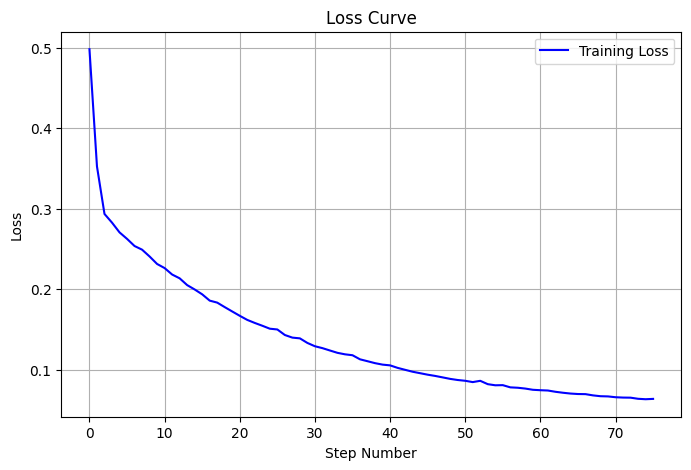

Model parameters saved to model1.json


In [32]:
# Petal width as output
y1 = X[:, 3]

# Sepal Length, width and Petal length as input
X_model1 = X[:, :3]


X_train1, X_test1, y_train1, y_test1 = train_test_split(X_model1, y1, test_size=0.1, stratify=data.target)

model1 = LinearRegression()
model1.fit(X_train1, y_train1)
model1.save("model1.json")

# ***Model 2***

Loss curve saved as 'loss_curve.png'


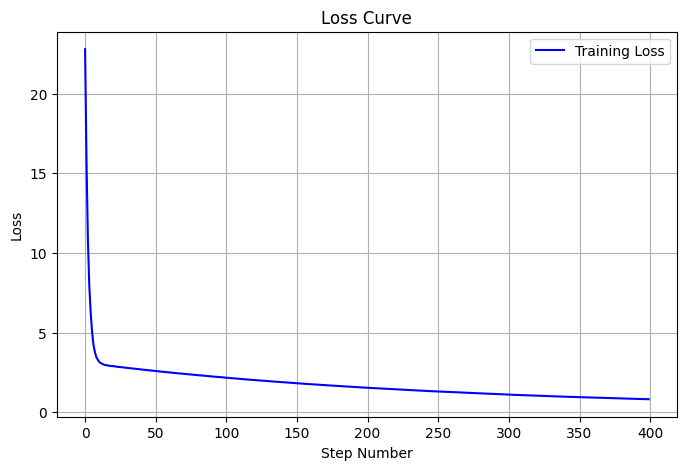

Model parameters saved to model2.json


In [21]:
y2 = X[:, 0]
# sepal length as output

X_model2 = X[:, 2:4]
# petal length and width as input


X_train2, X_test2, y_train2, y_test2 = train_test_split(X_model2, y2, test_size=0.1, stratify=data.target)

model2 = LinearRegression()
model2.fit(X_train2, y_train2)
model2.save("model2.json")

# ***Model 3***

Early stopping at epoch 78
Loss curve saved as 'loss_curve.png'


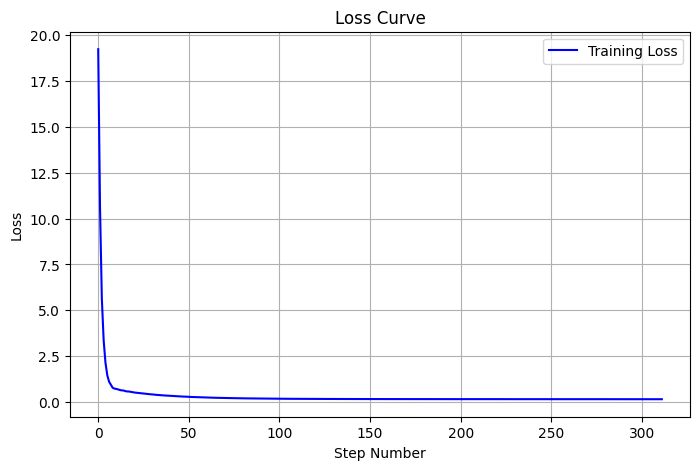

Model parameters saved to model3.json


In [33]:
# sepal length as output
y3 = X[:, 0]

# sepal width and petal length, width as input
X_model3 = X[:, 1:4]


X_train3, X_test3, y_train3, y_test3 = train_test_split(X_model3, y3, test_size=0.1, stratify=data.target)

model3 = LinearRegression()
# use predict
model3.fit(X_train3, y_train3)
model3.save("model3.json")

# ***Model 4***

Early stopping at epoch 9
Loss curve saved as 'loss_curve.png'


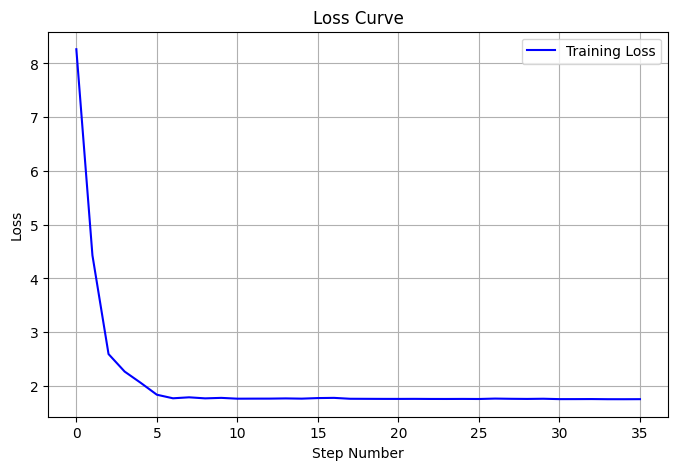

Model parameters saved to model4.json


In [23]:
# petal length as input
y4 = X[:, 2]

# sepal length as input
X_model4 = X[:, 0].reshape(-1, 1)
X_train4, X_test4, y_train4, y_test4 = train_test_split(X_model4, y4, test_size=0.1, stratify=data.target)

model4 = LinearRegression()
model4.fit(X_train4, y_train4)

model4.save("model4.json")

# ***1.5.3 Model with L2 Regularization***

Early stopping at epoch 13
Loss curve saved as 'loss_curve.png'


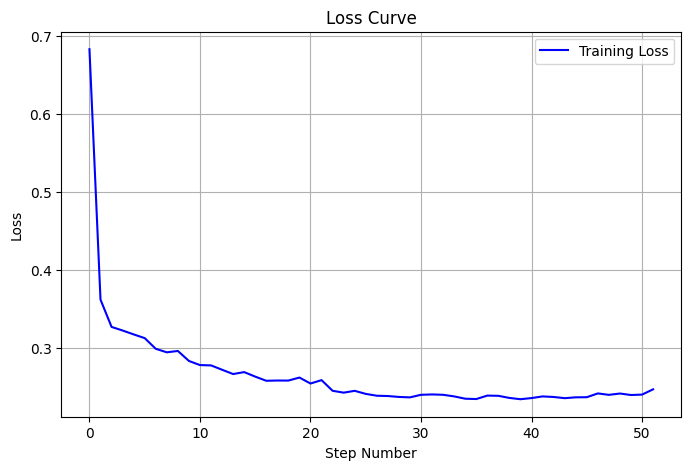

Model parameters saved to model1_L2.json


In [24]:
# Petal width as output
y1 = X[:, 3]

# Sepal Length, width and Petal length as input
X_model1 = X[:, :3]

X_train1, X_test1, y_train1, y_test1 = train_test_split(X_model1, y1, test_size=0.1, stratify=data.target)

model1 = LinearRegression()
model1.fit(X_train1, y_train1,regularization=2)
model1.save("model1_L2.json")



# ***1.5.4 Testing***

## ***eval_regression1***

In [25]:
model = LinearRegression()
model.load("model1.json")
mse = model.score(X_test1, y_test1)
print(f"Mean Squared Error is : {mse}")



Model parameters loaded from model1.json
Mean Squared Error is : 0.046045702064929216


## ***eval_regression2***

In [26]:
model = LinearRegression()
model.load("model2.json")
mse = model.score(X_test2, y_test2)
print(f"Mean Squared Error is: {mse}")


Model parameters loaded from model2.json
Mean Squared Error is: 0.7824190612909765


# ***eval_regression3***

In [27]:
model = LinearRegression()
model.load("model3.json")
mse = model.score(X_test3, y_test3)
print(f"Mean Squared Error is: {mse}")

Model parameters loaded from model3.json
Mean Squared Error is: 0.24048928638698794


# ***eval_regression4***

In [28]:
model = LinearRegression()
model.load("model4.json")
mse = model.score(X_test4, y_test4)
print(f"Mean Squared Error is: {mse}")

Model parameters loaded from model4.json
Mean Squared Error is: 1.8297438383458304


# ***eval_regression1_L2***

In [29]:
model = LinearRegression()
model.load("model1_L2.json")
mse = model.score(X_test1, y_test1)
print(f"Mean Squared Error is : {mse}")

Model parameters loaded from model1_L2.json
Mean Squared Error is : 0.11187821538100673


Model 1, which uses three input features—Sepal Length, Sepal Width, and Petal Length—to predict the output feature, Petal Width, is the most predictive. This is because it achieved the lowest Mean Squared Error (MSE) compared to other models, indicating better accuracy.